Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


mounting drive

In [ ]:
!unzip "/content/drive/MyDrive/chest-xray-pneumonia.zip"

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#tensorflowand.tf.keras
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

In [ ]:
train = '/content/chest_xray/train'
test = '/content/chest_xray/train'
val = '/content/chest_xray/val'

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5216 files belonging to 2 classes.


training files

In [ ]:
test_ds =tf.keras.preprocessing.image_dataset_from_directory(
    test,
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size)

Found 5216 files belonging to 2 classes.


testing files

In [ ]:
val_ds =tf.keras.preprocessing.image_dataset_from_directory(
    val,
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size)

Found 16 files belonging to 2 classes.


validating files

In [ ]:
class_names=train_ds.class_names
print(class_names)

['NORMAL', 'PNEUMONIA']


class name of images

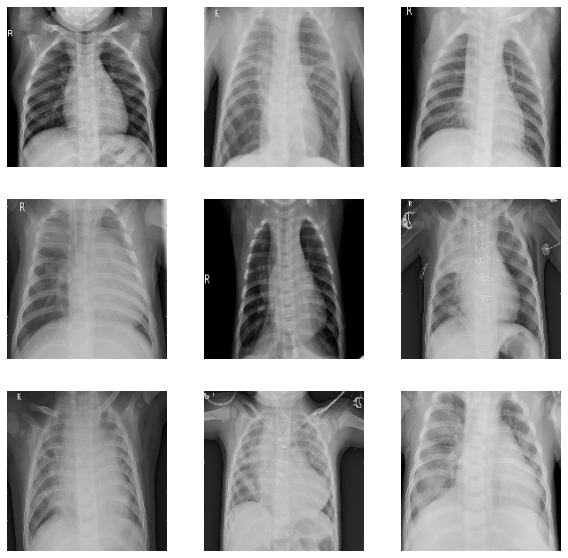

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title(class_names[labels[i]])
    plt.axis("off")

presenting images

In [ ]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.044043433 0.8585584


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

classification of the model

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

compilation of model

In [ ]:
num_epochs = 50

history = model.fit_generator(
  train_ds,
  validation_data=val_ds,
  epochs=num_epochs
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


163/163 [==============================] - 45s 269ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.6638 - val_accuracy: 0.8750
Epoch 2/50
163/163 [==============================] - 43s 267ms/step - loss: 0.0122 - accuracy: 0.9965 - val_loss: 0.4024 - val_accuracy: 0.9375
Epoch 3/50
163/163 [==============================] - 43s 267ms/step - loss: 0.0131 - accuracy: 0.9962 - val_loss: 0.4325 - val_accuracy: 0.8750
Epoch 4/50
163/163 [==============================] - 43s 266ms/step - loss: 8.9076e-04 - accuracy: 1.0000 - val_loss: 0.4156 - val_accuracy: 0.8750
Epoch 5/50
163/163 [==============================] - 43s 266ms/step - loss: 6.5324e-04 - accuracy: 0.9998 - val_loss: 0.5913 - val_accuracy: 0.8750
Epoch 6/50
163/163 [==============================] - 43s 267ms/step - loss: 0.0064 - accuracy: 0.9981 - val_loss: 0.8032 - val_accuracy: 0.8750
Epoch 7/50
163/163 [==============================] - 43s 266ms/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 0.3116 - val_accur

number of iteration 

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(num_epochs)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluation of model 

In [ ]:
score=model.evaluate(test_ds)
#print(f'Test loss:{score[0]/Test accuracy:{score[1]}')
print(score)

# Testing the model

In [ ]:
predictions = model.predict(test_ds)
predictions

In [ ]:
labels=np.argmax(predictions,1)
print(labels)

In [ ]:
len(labels)

In [ ]:
model.save('pneumonia classification_model')

INFO:tensorflow:Assets written to: pneumonia classification_model/assets
